In [3]:
import pandas as pd
df = pd.read_csv('Mall_Customers-1.csv')
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
# Display the count
num_rows = len(df)
print(f"Total number of customers: {num_rows}")
df.count()

Total number of customers: 200


Age               200
Annual Income     200
Spending Score    200
dtype: int64

In [7]:
# Display the column (categories)
num_column = df.shape[1]
print(f"Total number of categories: {num_column}")

Total number of categories: 3


In [9]:
# Check data types of each column
print(df.dtypes)

Age               int64
Annual Income     int64
Spending Score    int64
dtype: object


In [11]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Age               0
Annual Income     0
Spending Score    0
dtype: int64


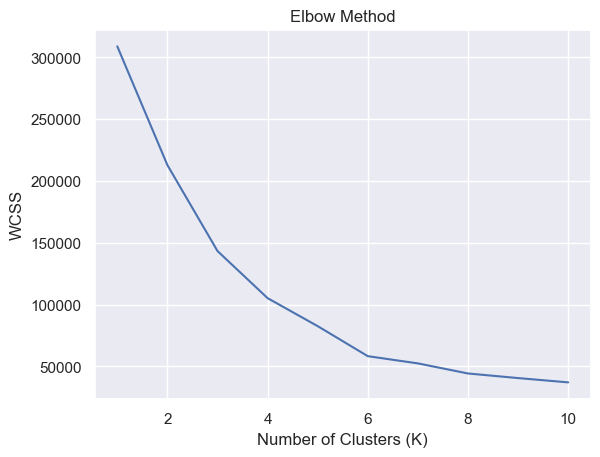

In [17]:
#Elbow methods (set random_state=0)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

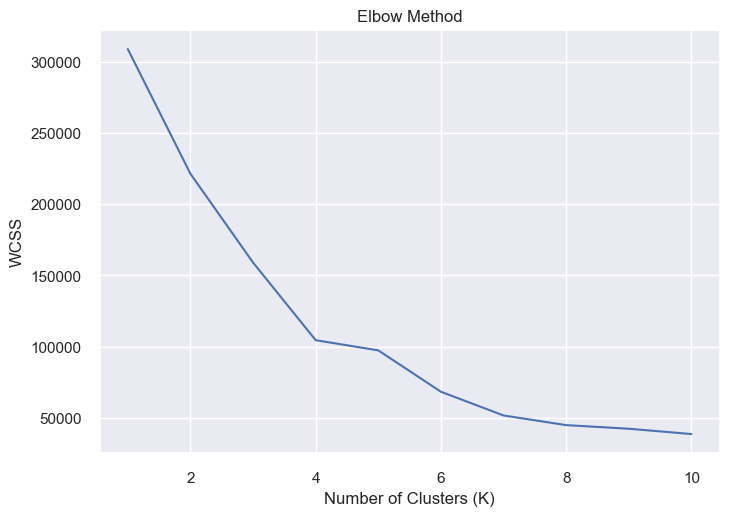

In [73]:
#Elbow methods (set random_state=42)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [19]:
#Get Silhouette Score for K=4
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4).fit(df)
print("Cluster Centroid Values:")
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(df)
#print (label)
kmeans_silhouette = silhouette_score(df, label)
print("Overall Average Silhouette Score:")
print(kmeans_silhouette)

Cluster Centroid Values:
[[40.39473684 87.         18.63157895]
 [32.69230769 86.53846154 82.12820513]
 [44.89473684 48.70526316 42.63157895]
 [24.82142857 28.71428571 74.25      ]]
Overall Average Silhouette Score:
0.39236034113086576


In [23]:
#Get Silhouette Score for K=5
kmeans = KMeans(n_clusters=5).fit(df)
print("Cluster Centroid Values:")
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(df)
#print (label)
kmeans_silhouette = silhouette_score(df, label)
print("Overall Average Silhouette Score:")
print(kmeans_silhouette)

Cluster Centroid Values:
[[43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [45.2173913  26.30434783 20.91304348]]
Overall Average Silhouette Score:
0.39660840436122724


In [21]:
#Get Silhouette Score for K=6
kmeans = KMeans(n_clusters=6).fit(df)
print("Cluster Centroid Values:")
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(df)
#print (label)
kmeans_silhouette = silhouette_score(df, label)
print("Overall Average Silhouette Score:")
print(kmeans_silhouette)

Cluster Centroid Values:
[[36.94117647 76.88235294 11.35294118]
 [54.06       40.46       36.72      ]
 [32.69230769 86.53846154 82.12820513]
 [25.         25.26086957 77.60869565]
 [33.54716981 57.47169811 49.37735849]
 [45.05555556 98.88888889 22.55555556]]
Overall Average Silhouette Score:
0.41158817291653377


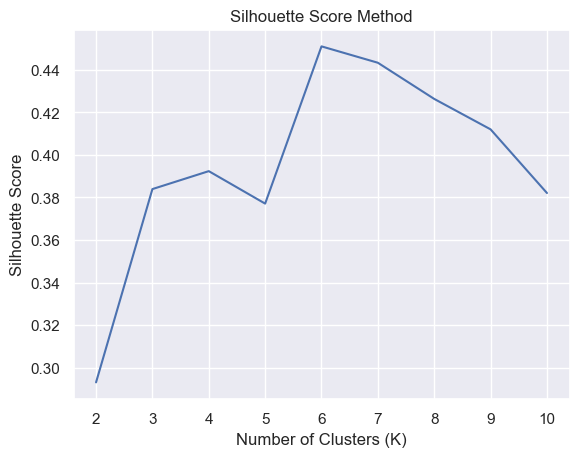

In [27]:
#Use Silhouette Score Method and plot the graph
silhouette_scores = []
for k in range(2, 11):  # K must be at least 2
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

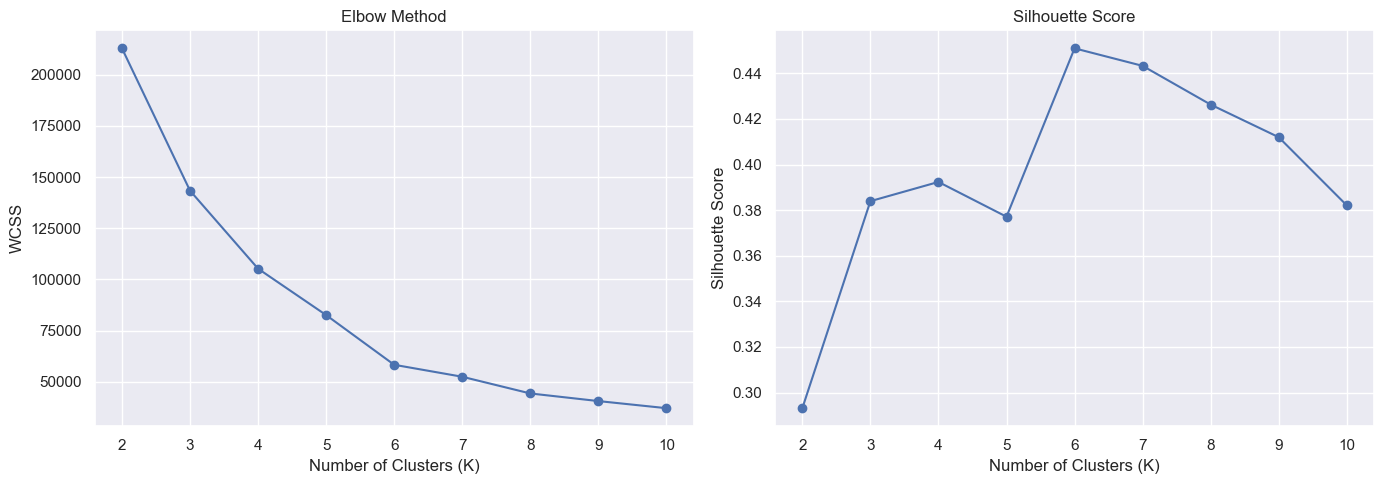

Optimal number of clusters according to Silhouette Score: 6


In [33]:
#Combined two methods together
wcss = []
silhouette_scores = []

# Evaluate for a range of K
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # WCSS for the Elbow Method
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))  # Silhouette Score

# Plotting the Elbow Method results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# Determining the optimal K
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters according to Silhouette Score: {optimal_k}")

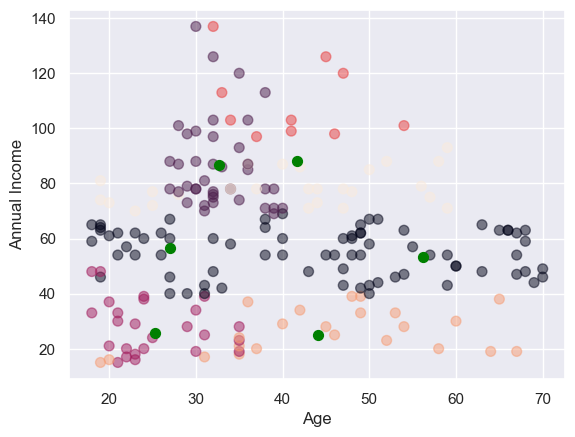

In [39]:
plt.scatter(df['Age'], df['Annual Income'], c= kmeans.labels_.astype(float), s=50,
alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

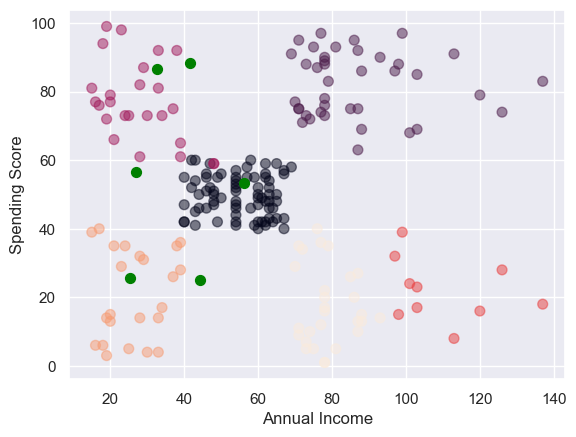

In [41]:
plt.scatter(df['Annual Income'], df['Spending Score'], c= kmeans.labels_.astype(float), s=50,
alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

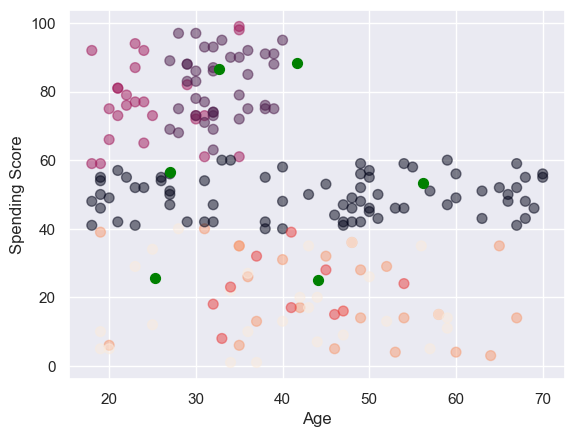

In [43]:
plt.scatter(df['Age'], df['Spending Score'], c= kmeans.labels_.astype(float), s=50,
alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [37]:
# Check number of clusters
num_clusters = kmeans.n_clusters
print(f"Number of clusters: {num_clusters}")

Number of clusters: 6


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


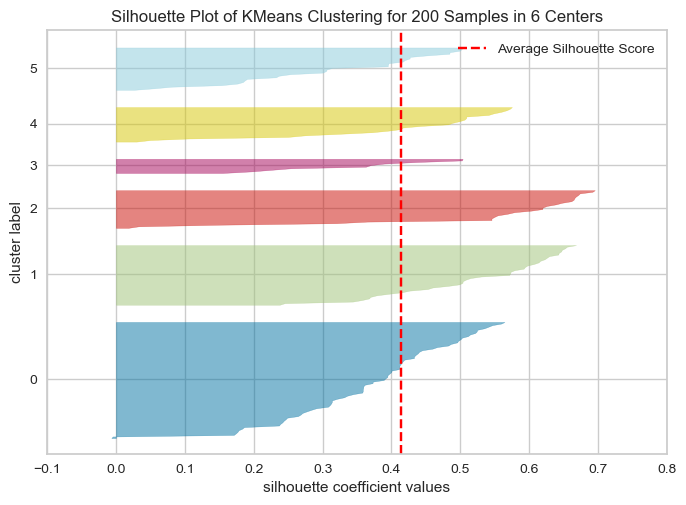

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
#Visualize Silhoutte coefficient
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [47]:
from mpl_toolkits.mplot3d import Axes3D

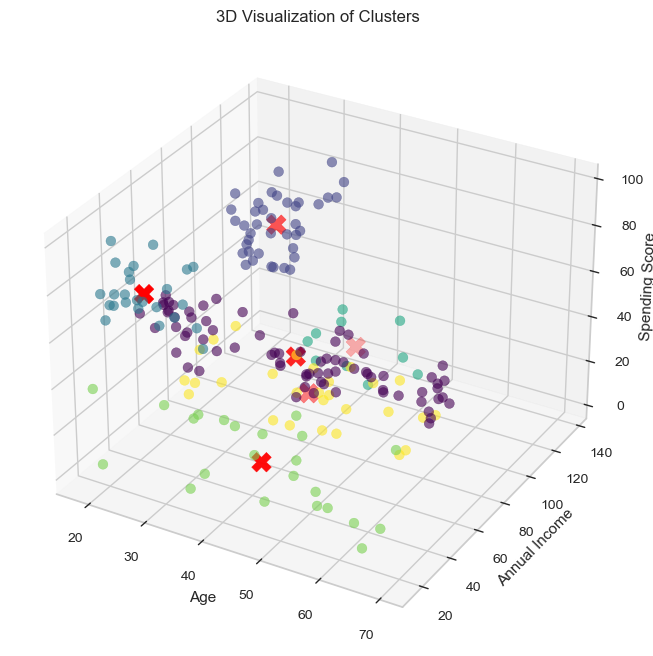

In [49]:
# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(df['Age'], df['Annual Income'], df['Spending Score'], c=labels, s=50, alpha=0.6, cmap='viridis')

# Scatter plot for centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X')

# Setting labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Visualization of Clusters')

plt.show()

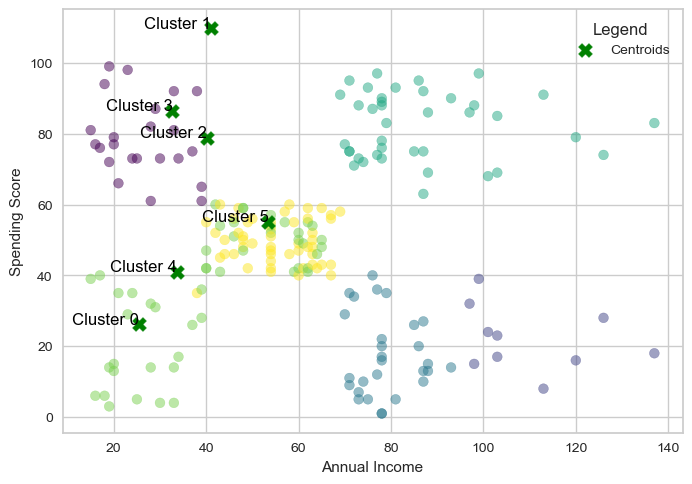

In [69]:
# Create a scatter plot for data points
scatter = plt.scatter(df['Annual Income'], df['Spending Score'], c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')

# Create a scatter plot for centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=100, marker='X', label='Centroids')

# Add legend for centroids
plt.legend(title='Legend')

# Annotate each cluster with its label
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i}', color='black', fontsize=12, ha='right')

# Set labels for axes
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Display the plot
plt.show()

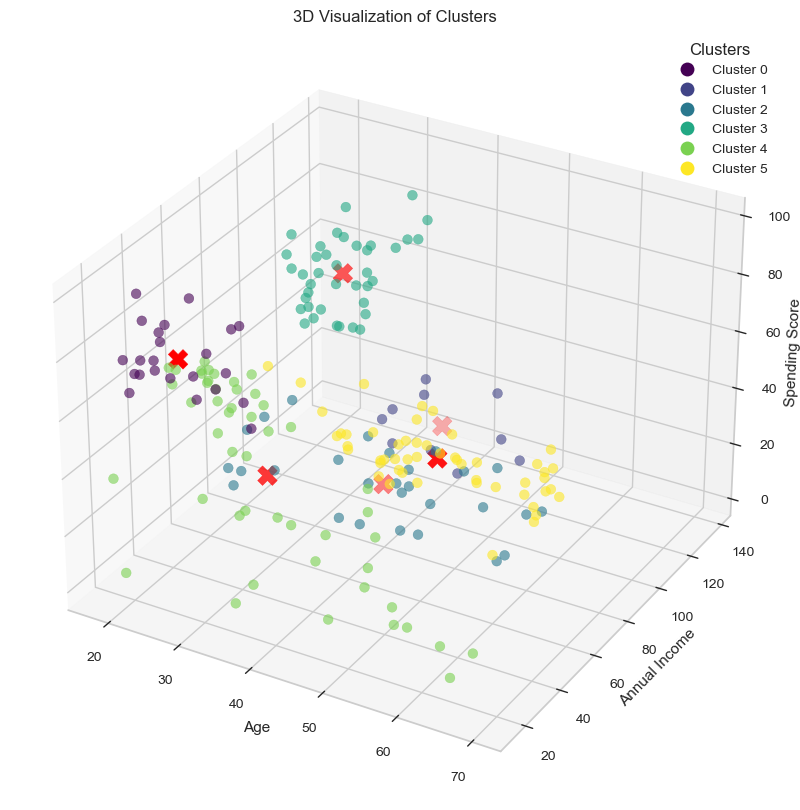

In [67]:
import numpy as np
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a figure and a 3D axis
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
scatter = ax.scatter(df['Age'], df['Annual Income'], df['Spending Score'], c=labels, s=50, alpha=0.6, cmap='viridis')

# Scatter plot for centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X')

# Create legend for clusters
# To avoid creating duplicate labels in the legend, we'll create a list of unique cluster labels
unique_labels = np.unique(labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10, linestyle='') for label in unique_labels]
labels_legend = [f'Cluster {label}' for label in unique_labels]
ax.legend(handles=handles, labels=labels_legend, title="Clusters")

# Set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Visualization of Clusters')

plt.show()

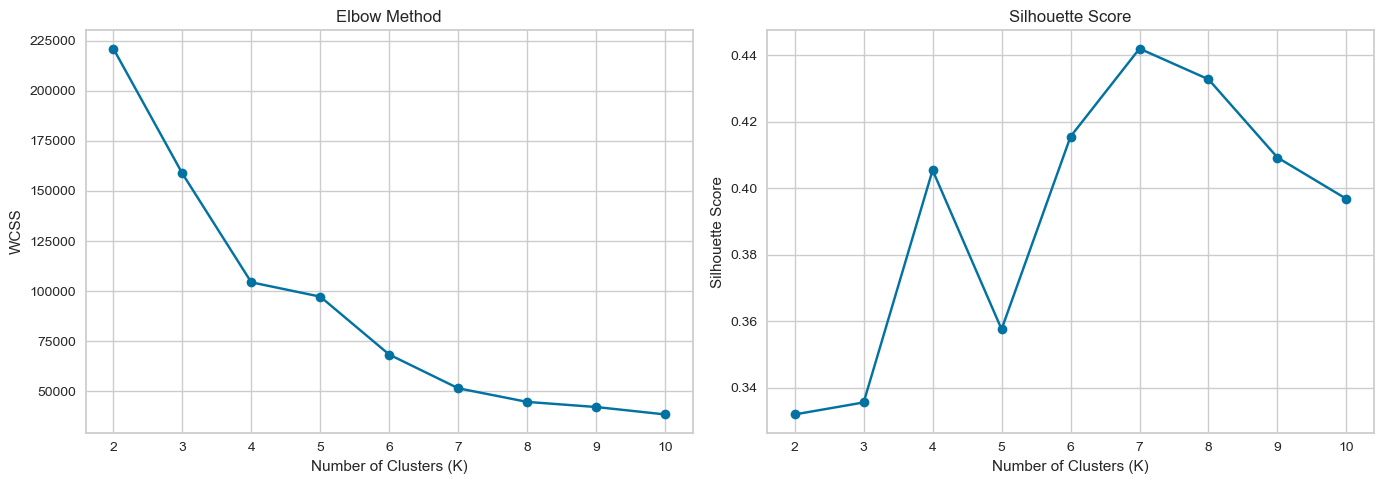

Optimal number of clusters according to Silhouette Score: 7


In [51]:
#try another random_state value (set random_state=42)
wcss = []
silhouette_scores = []

# Evaluate for a range of K
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # WCSS for the Elbow Method
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))  # Silhouette Score

# Plotting the Elbow Method results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# Determining the optimal K
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters according to Silhouette Score: {optimal_k}")